In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar archivo Excel
file_path = 'laminatesproduction.xlsx'

# Lista de hojas (nombres de pa칤ses)
sheet_names = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'Mexico', 'Peru']

# Cargar el archivo
xls = pd.ExcelFile(file_path)

### Descripci칩n de los Datos

In [ ]:
# Funci칩n para analizar una hoja
def analizar_hoja(sheet_name):
    print(f"\n游늯 Hoja: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=5)

    # Mostrar dimensiones
    #print(f"{sheet}: {df.shape}")
    print(f"游댌 Dimensi칩n del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")

    # An치lisis por columnas
    resumen = []
    #for col in df.columns:
    #     tipo_dato = df[col].dtype
    #     tipo = 'Num칠rico' if pd.api.types.is_numeric_dtype(df[col]) else 'Categ칩rico'
    #     n_valores_unicos = df[col].nunique()
    #     valores_unicos = df[col].unique() if n_valores_unicos <= 10 else f"{n_valores_unicos} 칰nicos"
    #     nulos = df[col].isnull().sum()

    #     resumen.append({
    #         "Nombre": col,
    #         "Tipo de dato": tipo_dato,
    #         "Tipo (Cat/Num)": tipo,
    #         "Valores 칰nicos": valores_unicos,
    #         "Valores nulos": nulos
    #     })
    resumen = pd.DataFrame({
        'Tipo de dato': df.dtypes,
       #'Valores 칰nicos': df.nunique(),
        'Valores no nulos': df.count(),
        'Valores nulos': df.isnull().sum()
    })
    resumen['Tipo (Cat/Num)'] = resumen['Tipo de dato'].apply(
        lambda x: 'Num칠rico' if pd.api.types.is_numeric_dtype(x) else 'Categ칩rico'
    )

    resumen_df = pd.DataFrame(resumen)
    print("\n游늷 Resumen de variables:")
    print(resumen_df)
    print("\n" + "="*50)

In [ ]:
# Ejecutar an치lisis por cada hoja
for sheet in sheet_names:
    analizar_hoja(sheet)


游늯 Hoja: Argentina
游댌 Dimensi칩n del dataset: 168 filas, 3 columnas

游늷 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168              0     Categ칩rico
Mid_Value          float64               167              1       Num칠rico
Mid_Change         float64               167              1       Num칠rico


游늯 Hoja: Brasil
游댌 Dimensi칩n del dataset: 168 filas, 3 columnas

游늷 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168              0     Categ칩rico
Mid_Value          float64               167              1       Num칠rico
Mid_Change         float64               167              1       Num칠rico


游늯 Hoja: Chile
游댌 Dimensi칩n del dataset: 168 filas, 3 columnas

游늷 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168    

### Exploraci칩n de los Datos

In [ ]:
# Funci칩n para realizar la exploraci칩n de datos
def exploracion_de_datos(sheet_name):
    print(f"\n游늯 Hoja: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=5)

    # Dividir las columnas en cualitativas y cuantitativas
    cuantitativas = df.select_dtypes(include=['float64', 'int64'])
    temporales = df.select_dtypes(include=['datetime64[ns]'])

    # An치lisis para variables cualitativas
    print("\n Distribuci칩n de frecuencias para variables cualitativas:")

    # Medidas estad칤sticas para variables cuantitativas
    print("\n Medidas estad칤sticas para variables cuantitativas:")

    if not temporales.empty:
        for col in temporales.columns:
            print(f"\nAn치lisis de la variable: {col}")
            print(f"- Media temporal (fecha): {temporales[col].mean()}")
            print(f"- Rango de fechas: {temporales[col].min()} - {temporales[col].max()}")

    if not cuantitativas.empty:
        for col in cuantitativas.columns:
            print(f"\nAn치lisis de la variable: {col}")

            # Descripci칩n estad칤stica con describe()
            desc = cuantitativas[col].describe()
            print(desc)

            # Cuartiles y Rango Intercuart칤lico (IQR)
            Q1 = desc['25%']
            Q3 = desc['75%']
            IQR = Q3 - Q1
            print(f"- Rango intercuart칤lico (IQR): {IQR}")

            # Outliers
            outliers = cuantitativas[(cuantitativas[col] < (Q1 - 1.5 * IQR)) | (cuantitativas[col] > (Q3 + 1.5 * IQR))]
            print(f"- Outliers detectados: {outliers.shape[0]}")

            #Series de tiempo
            plt.figure(figsize=(10, 4))
            plt.plot(df[temporales.columns[0]], df[col], marker='o')
            plt.title(f"Serie de tiempo de {col}")
            plt.xlabel("Fecha")
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.grid(True)
            plt.show()

            # Boxplot
            print("\n")
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=cuantitativas[col])
            plt.title(f"Boxplot de {col}")
            plt.show()

            # Histograma para distribuci칩n de datos
            plt.figure(figsize=(6, 4))
            sns.histplot(cuantitativas[col], kde=True, bins=20)
            plt.title(f"Histograma de {col}")
            plt.show()

    # An치lisis de correlaci칩n (Mapa de calor)
    print("\n An치lisis de correlaci칩n de las variables cuantitativas:")
    if not cuantitativas.empty and cuantitativas.shape[1] > 1:
        corr_matrix = cuantitativas.corr()
        plt.figure(figsize=(4, 3))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Mapa de calor de la correlaci칩n entre variables cuantitativas")
        plt.show()

    print("\n" + "="*40)


游늯 Hoja: Argentina

 Distribuci칩n de frecuencias para variables cualitativas:

 Medidas estad칤sticas para variables cuantitativas:

An치lisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

An치lisis de la variable: Mid_Value
count    167.000000
mean     379.886813
std       65.630093
min      126.973333
25%      349.065690
50%      393.233375
75%      418.902624
max      499.598000
Name: Mid_Value, dtype: float64
- Rango intercuart칤lico (IQR): 69.8369336439531
- Outliers detectados: 8


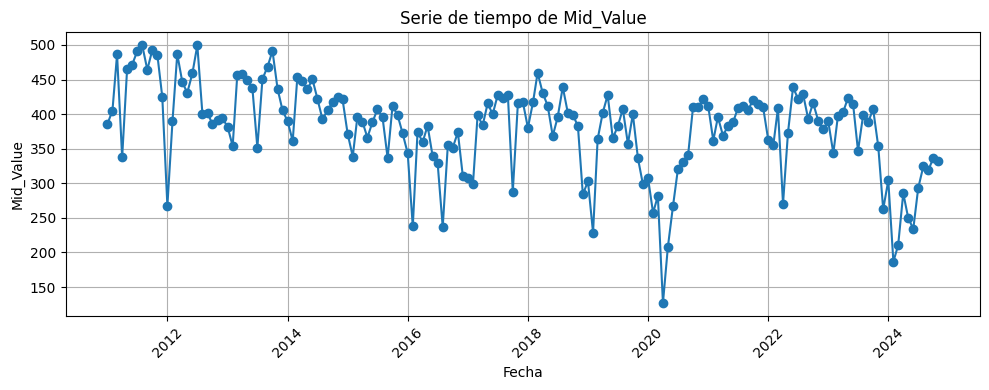

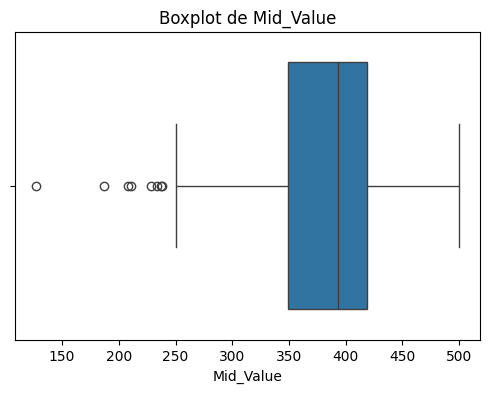

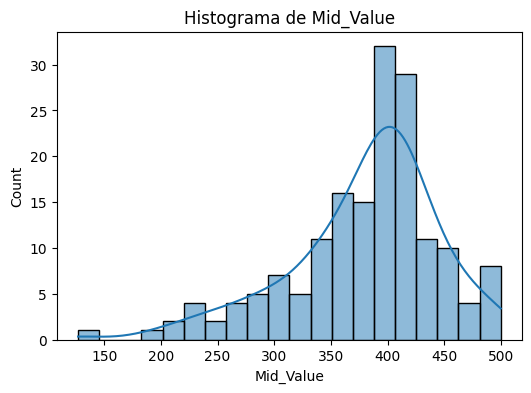


An치lisis de la variable: Mid_Change
count    167.000000
mean       1.370644
std       17.337055
min      -54.919856
25%       -6.937415
50%       -0.582022
75%        6.551765
max       63.820487
Name: Mid_Change, dtype: float64
- Rango intercuart칤lico (IQR): 13.489180198366611
- Outliers detectados: 21


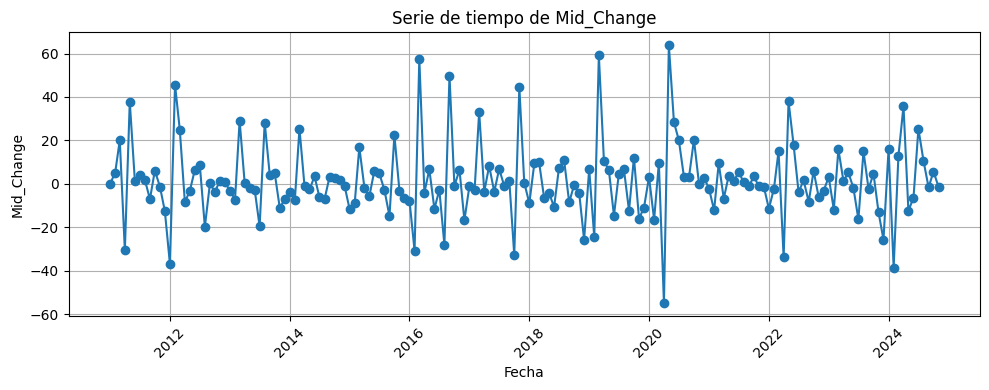

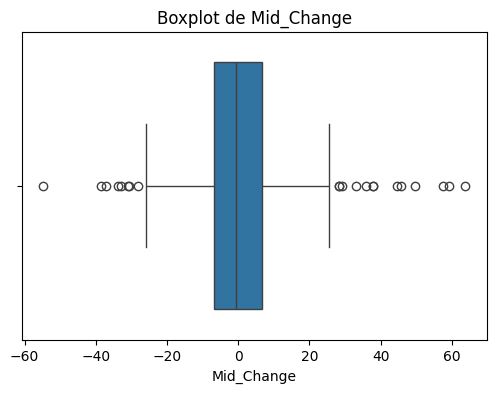

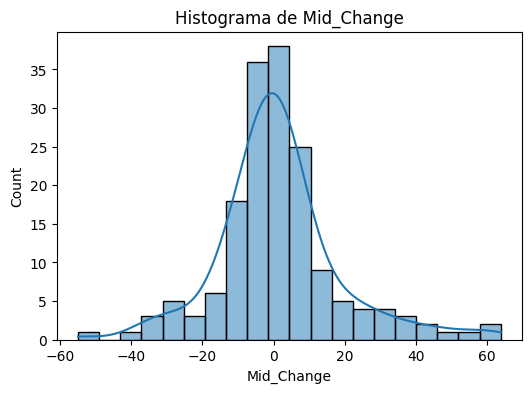


 An치lisis de correlaci칩n de las variables cuantitativas:


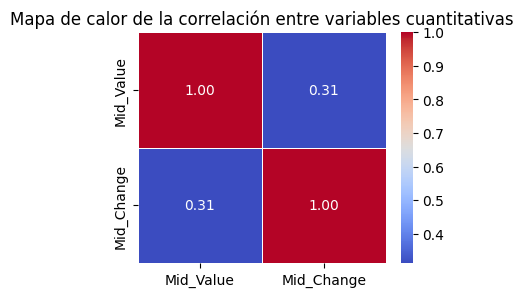



游늯 Hoja: Brasil

 Distribuci칩n de frecuencias para variables cualitativas:

 Medidas estad칤sticas para variables cuantitativas:

An치lisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

An치lisis de la variable: Mid_Value
count     167.000000
mean     1973.984844
std       200.814770
min      1278.480000
25%      1865.123000
50%      1972.000000
75%      2129.500000
max      2436.644000
Name: Mid_Value, dtype: float64
- Rango intercuart칤lico (IQR): 264.37699999999995
- Outliers detectados: 4


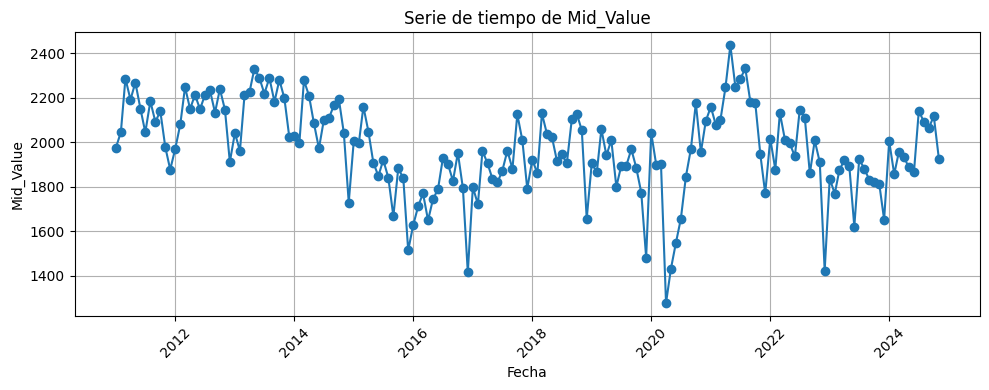

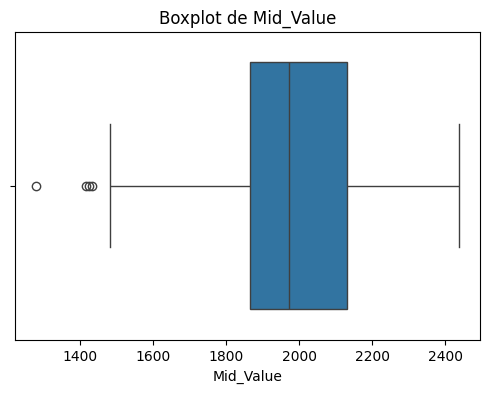

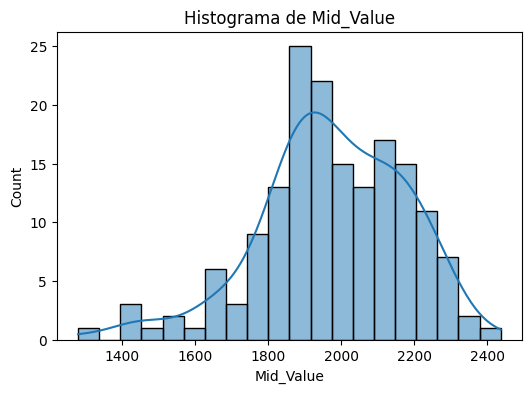


An치lisis de la variable: Mid_Change
count    167.000000
mean       0.406793
std        9.225826
min      -32.802084
25%       -4.596216
50%       -0.588813
75%        5.529448
max       37.811842
Name: Mid_Change, dtype: float64
- Rango intercuart칤lico (IQR): 10.125664049023445
- Outliers detectados: 7


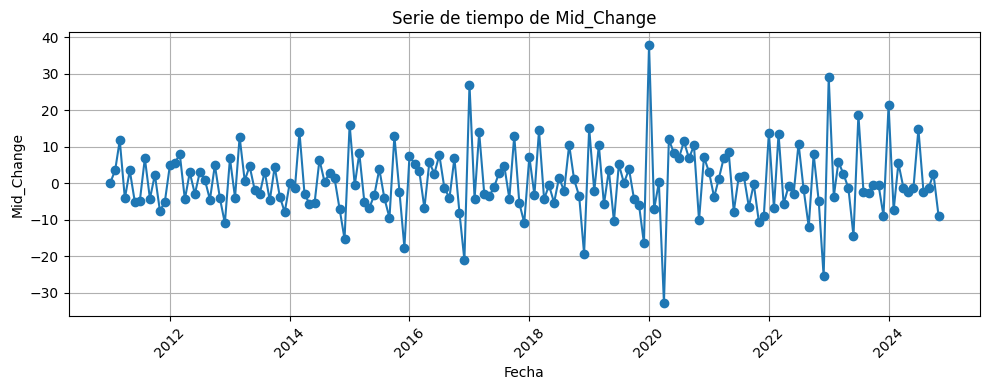

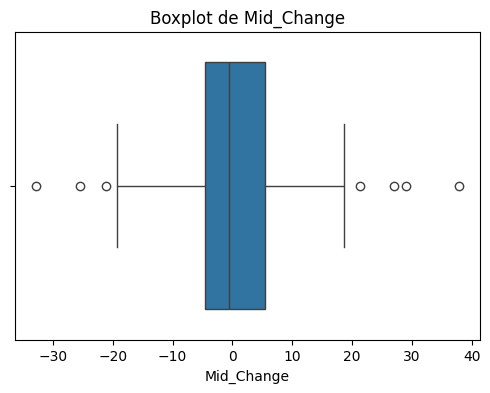

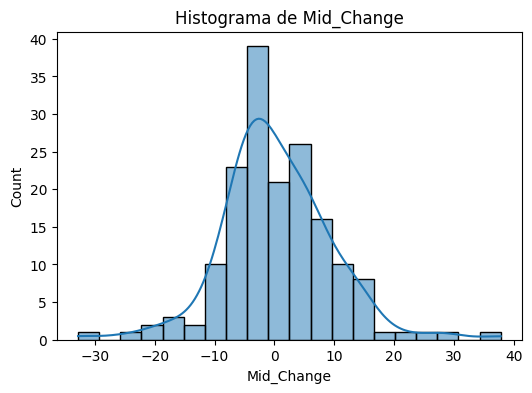


 An치lisis de correlaci칩n de las variables cuantitativas:


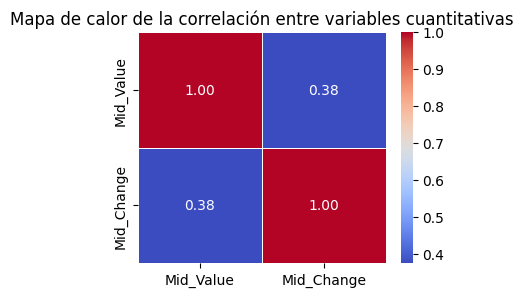



游늯 Hoja: Chile

 Distribuci칩n de frecuencias para variables cualitativas:

 Medidas estad칤sticas para variables cuantitativas:

An치lisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

An치lisis de la variable: Mid_Value
count    167.000000
mean      95.426125
std       21.777628
min       29.215000
25%       84.385000
50%       94.117396
75%      106.959206
max      151.277000
Name: Mid_Value, dtype: float64
- Rango intercuart칤lico (IQR): 22.574205500000232
- Outliers detectados: 12


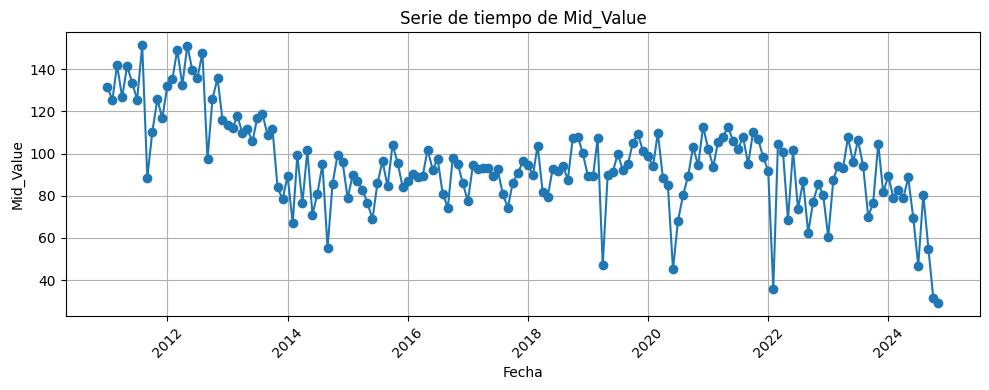

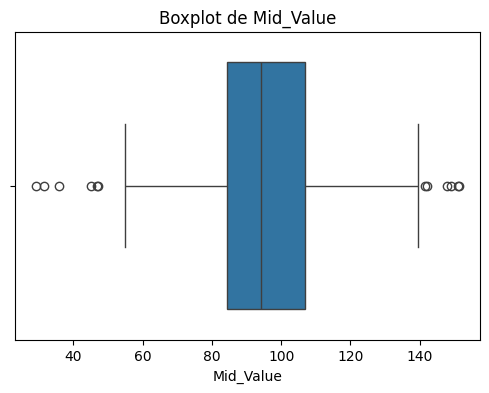

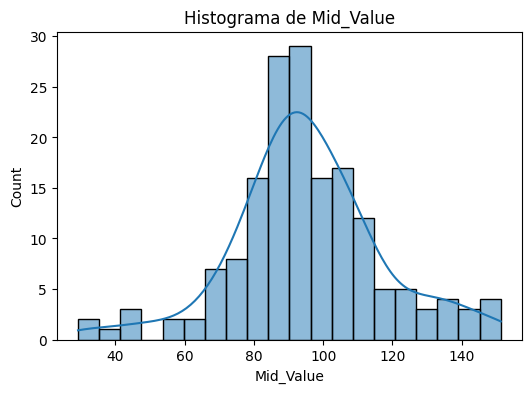


An치lisis de la variable: Mid_Change
count    167.000000
mean       1.780128
std       25.339972
min      -60.781206
25%       -8.362898
50%       -1.195237
75%       12.205299
max      190.053071
Name: Mid_Change, dtype: float64
- Rango intercuart칤lico (IQR): 20.568197491071448
- Outliers detectados: 14


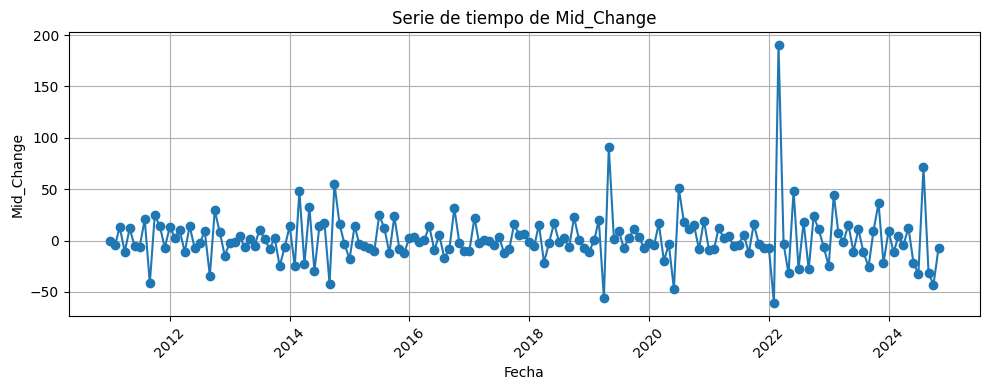

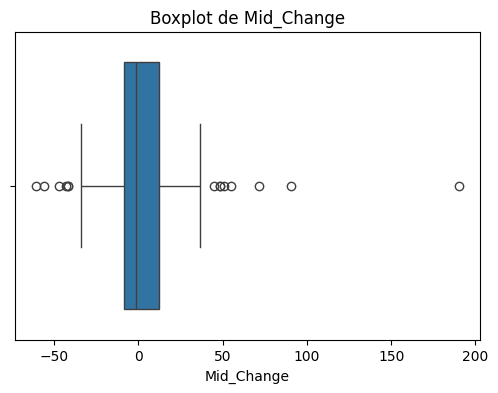

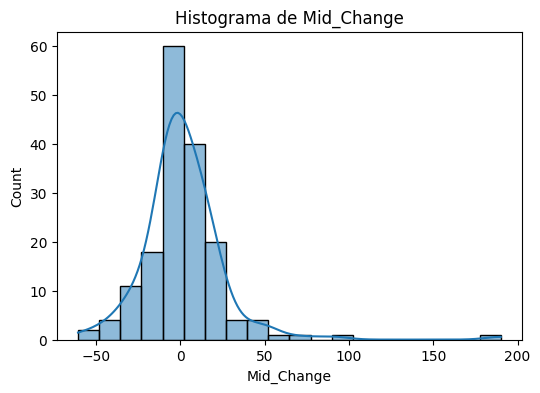


 An치lisis de correlaci칩n de las variables cuantitativas:


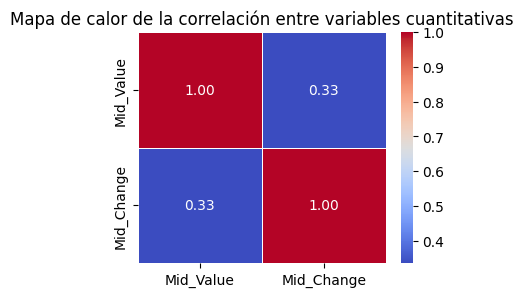



游늯 Hoja: Colombia

 Distribuci칩n de frecuencias para variables cualitativas:

 Medidas estad칤sticas para variables cuantitativas:

An치lisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

An치lisis de la variable: Mid_Value
count    167.000000
mean     143.965915
std       19.849157
min       10.236241
25%      135.048722
50%      146.255000
75%      156.985413
max      178.996762
Name: Mid_Value, dtype: float64
- Rango intercuart칤lico (IQR): 21.93669158750015
- Outliers detectados: 2


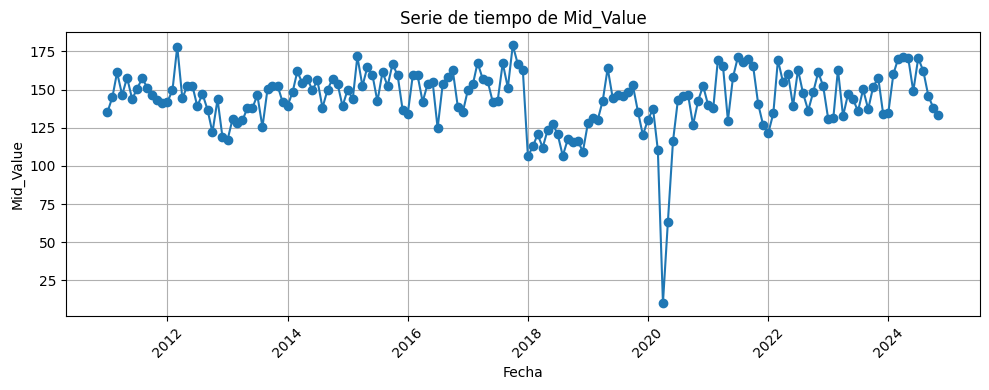

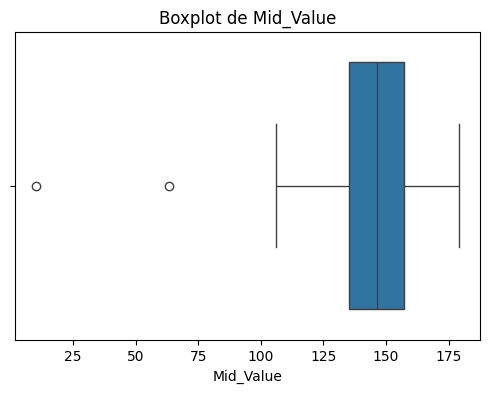

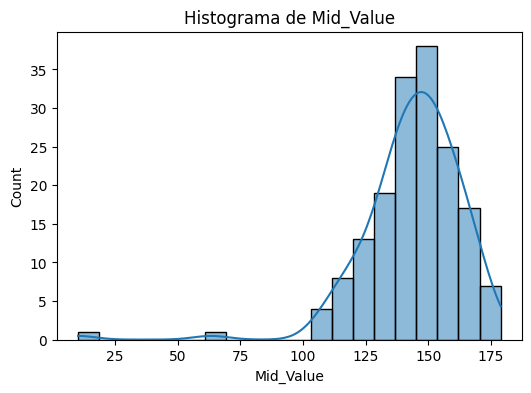


An치lisis de la variable: Mid_Change
count    167.000000
mean       3.575733
std       42.545908
min      -90.723520
25%       -6.946791
50%        0.369781
75%        8.034145
max      518.766801
Name: Mid_Change, dtype: float64
- Rango intercuart칤lico (IQR): 14.980935479956777
- Outliers detectados: 4


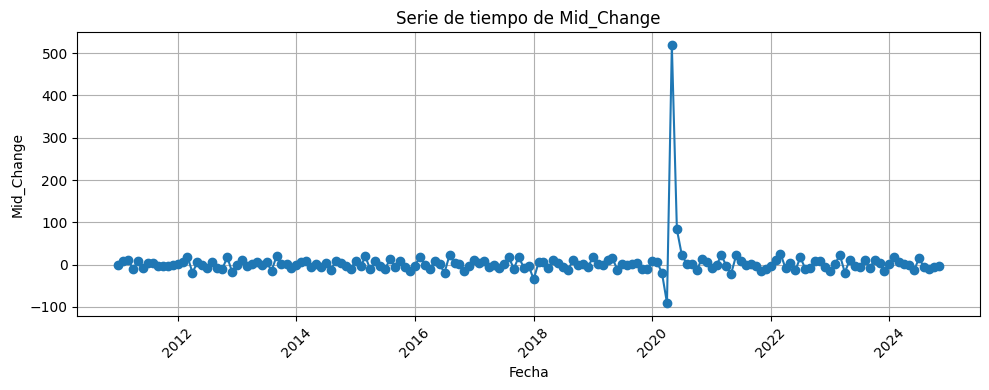

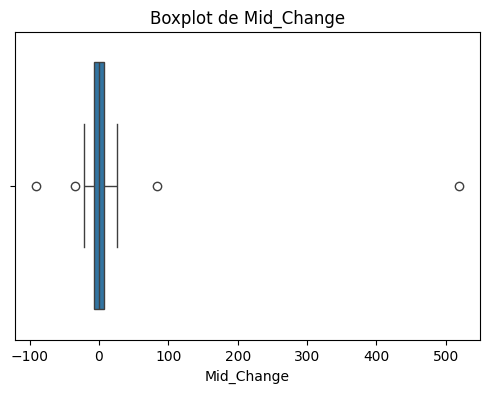

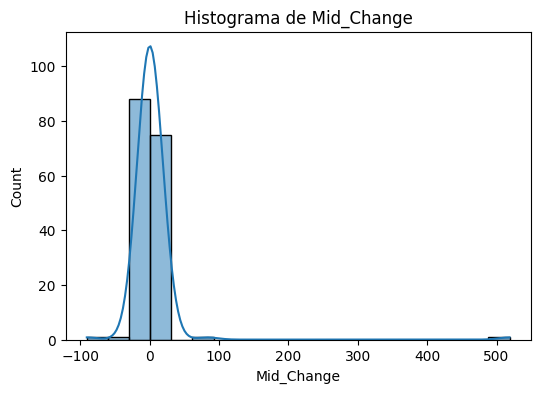


 An치lisis de correlaci칩n de las variables cuantitativas:


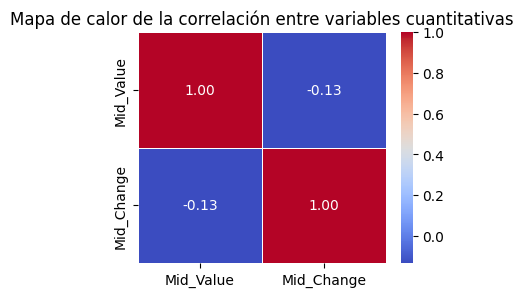



游늯 Hoja: Mexico

 Distribuci칩n de frecuencias para variables cualitativas:

 Medidas estad칤sticas para variables cuantitativas:

An치lisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

An치lisis de la variable: Mid_Value
count     167.000000
mean     1477.455592
std       132.973643
min      1054.719002
25%      1375.617924
50%      1475.250220
75%      1565.135823
max      1804.985388
Name: Mid_Value, dtype: float64
- Rango intercuart칤lico (IQR): 189.51789843595384
- Outliers detectados: 1


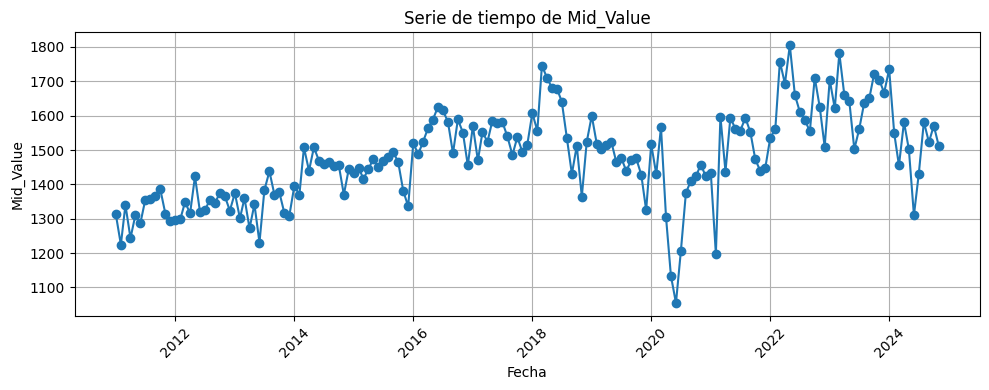

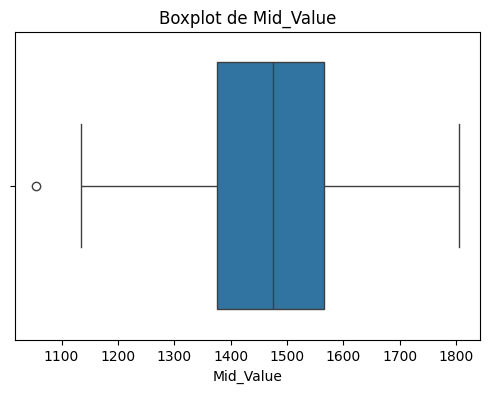

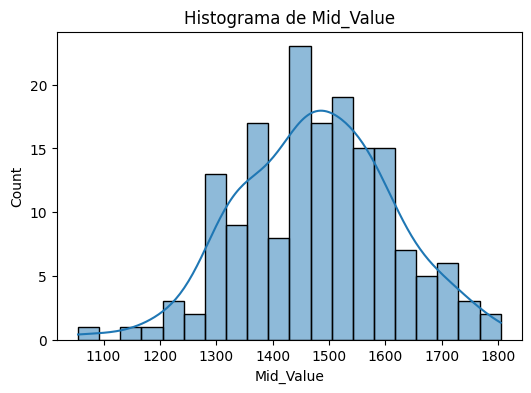


An치lisis de la variable: Mid_Change
count    167.000000
mean       0.286610
std        6.481232
min      -16.737895
25%       -3.363294
50%       -0.348143
75%        3.844624
max       33.354835
Name: Mid_Change, dtype: float64
- Rango intercuart칤lico (IQR): 7.207918454379785
- Outliers detectados: 3


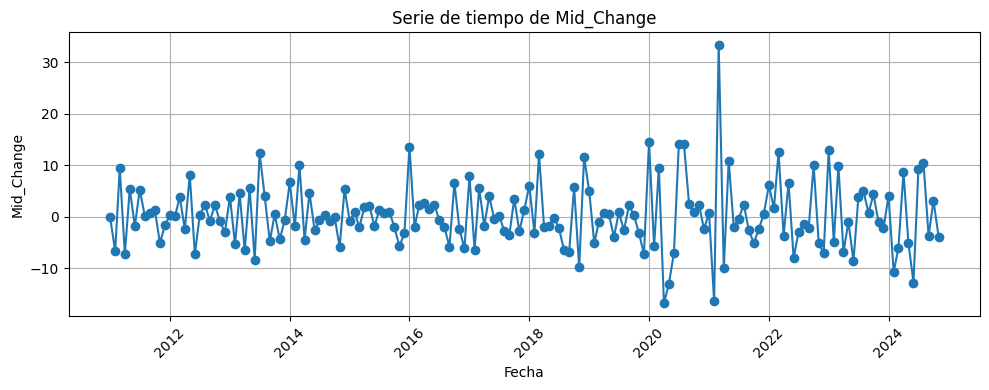

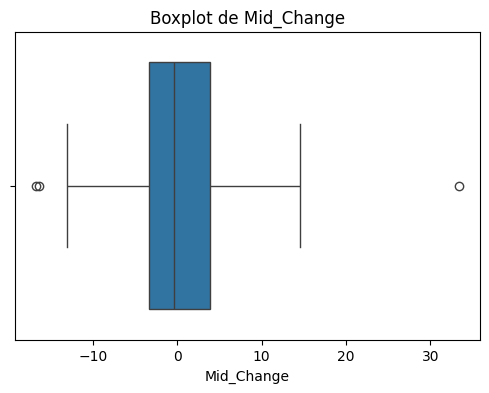

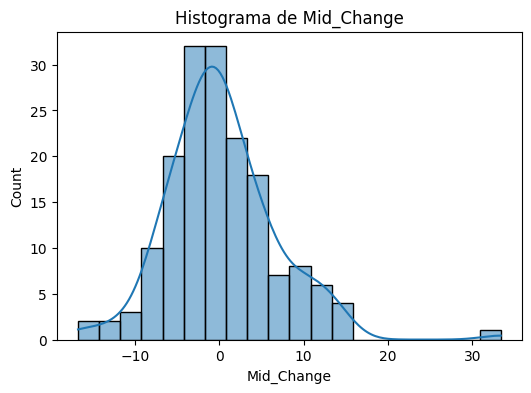


 An치lisis de correlaci칩n de las variables cuantitativas:


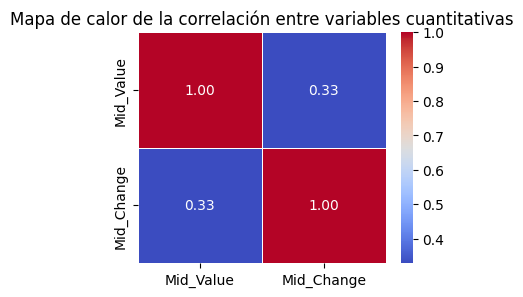



游늯 Hoja: Peru

 Distribuci칩n de frecuencias para variables cualitativas:

 Medidas estad칤sticas para variables cuantitativas:

An치lisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

An치lisis de la variable: Mid_Value
count    165.000000
mean     121.147746
std       29.632751
min       23.457075
25%      105.463000
50%      121.031329
75%      137.442641
max      217.980378
Name: Mid_Value, dtype: float64
- Rango intercuart칤lico (IQR): 31.979641317998983
- Outliers detectados: 7


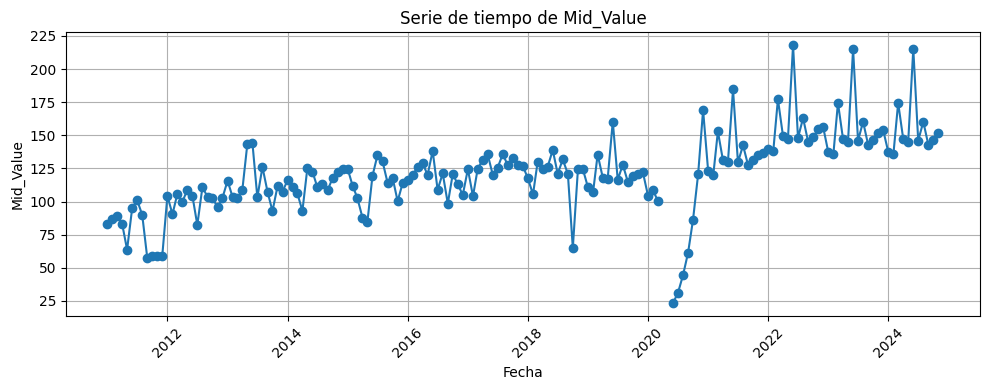

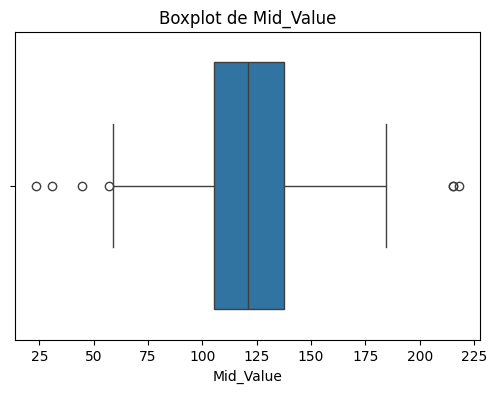

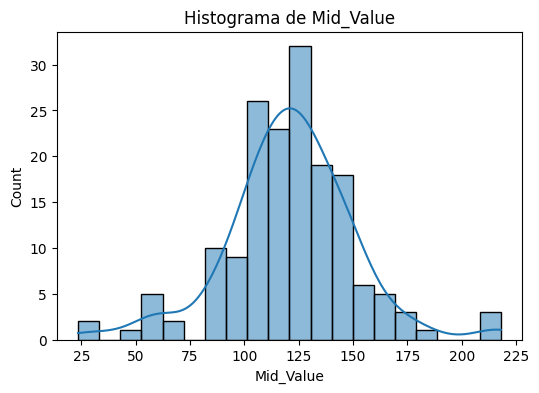


An치lisis de la variable: Mid_Change
count    164.000000
mean       3.064219
std       20.055120
min      -46.226923
25%       -9.851042
50%        0.789777
75%        9.357833
max       91.146643
Name: Mid_Change, dtype: float64
- Rango intercuart칤lico (IQR): 19.208875723922137
- Outliers detectados: 14


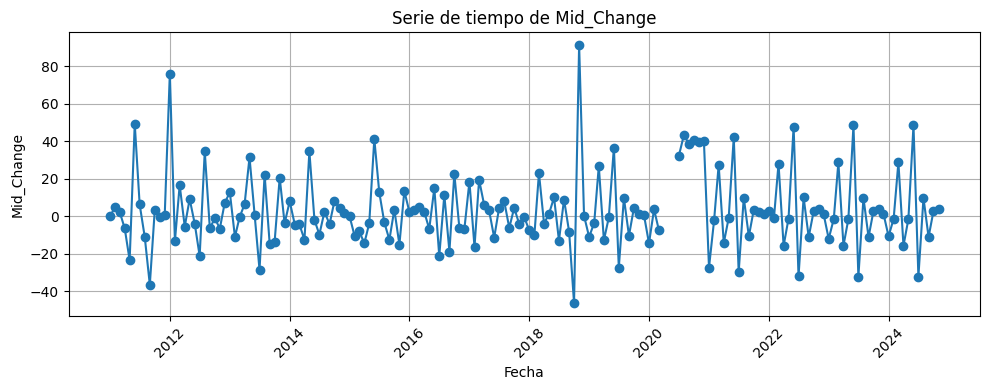

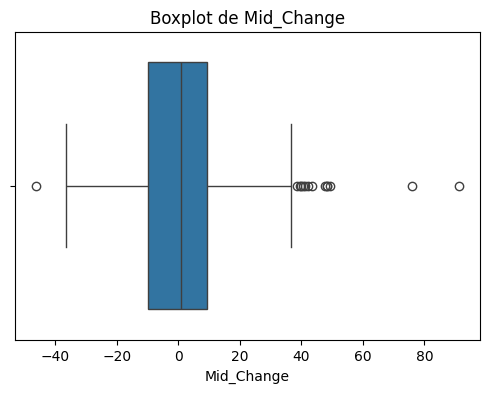

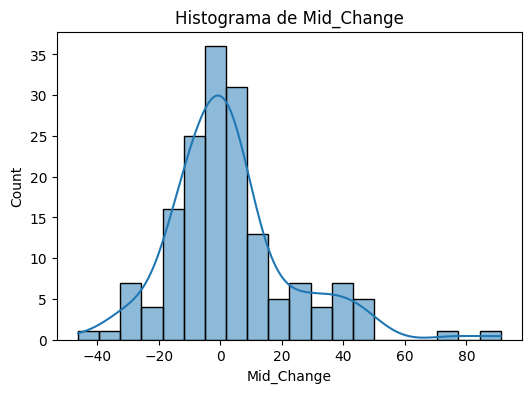


 An치lisis de correlaci칩n de las variables cuantitativas:


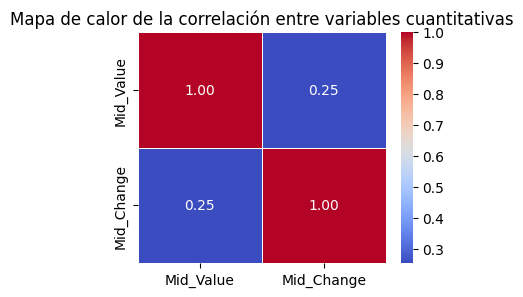

In [ ]:
# Ejecutar el an치lisis para cada hoja
for sheet in sheet_names:
    exploracion_de_datos(sheet)